## Softmax regression in sklearn

In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [18]:
# legge i dati in dataframe pandas
data = pd.read_csv("iris.csv", delimiter=';')

# calcola dimensione dei dati
n = len(data)

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['petal_length','petal_width']])
t = np.array(data['class']).reshape(-1,1)

In [19]:
encoder = LabelEncoder()
t = encoder.fit_transform(t)

# split dataset in train and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

In [20]:
scaler = StandardScaler()
logreg = LogisticRegression()

model = Pipeline([('scale', scaler), ('clf', logreg)])

model.set_params(clf__C=1e5)
model = model.fit(X_train, t_train)

In [21]:
delta1=max(X[:,0])-min(X[:,0])
delta2=max(X[:,1])-min(X[:,1])
min1=min(X[:,0])-delta1/10
max1=max(X[:,0])+delta1/10
min2=min(X[:,1])-delta2/10
max2=max(X[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)
p2 = p[:,2].reshape(u.shape)

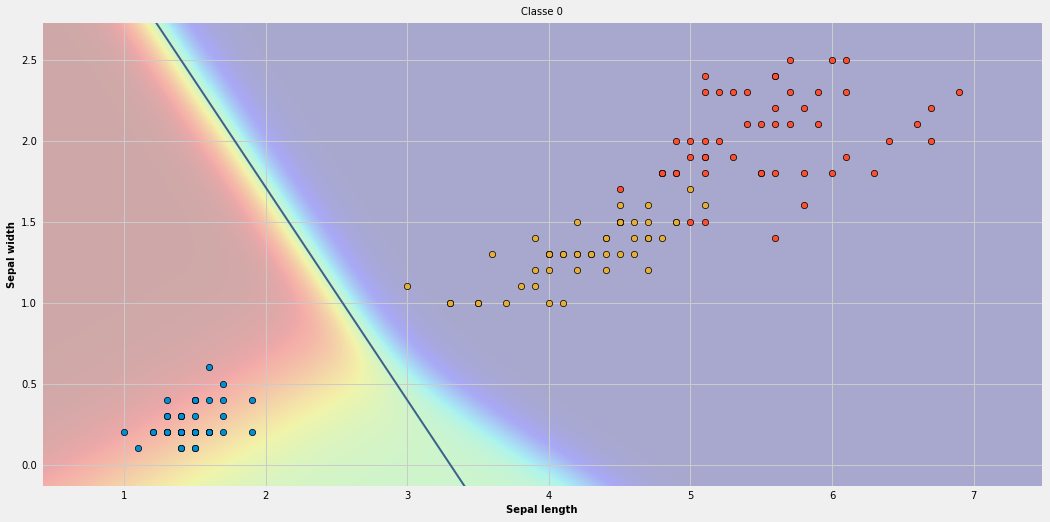

In [22]:
X_s, t_s=X, t
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p0, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p0, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Sepal length', fontsize=10)
plt.ylabel('Sepal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 0')
plt.show()

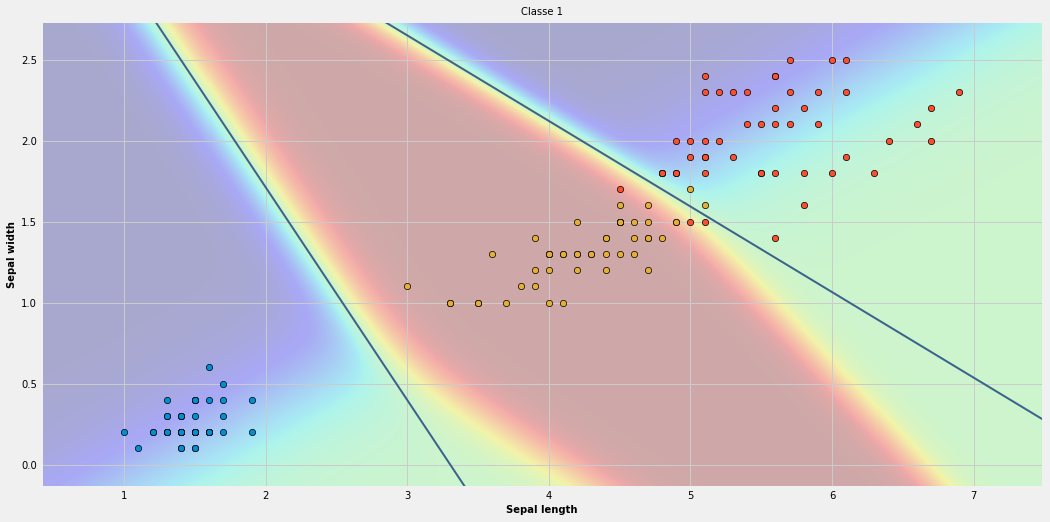

In [23]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p1, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Sepal length', fontsize=10)
plt.ylabel('Sepal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 1')
plt.show()

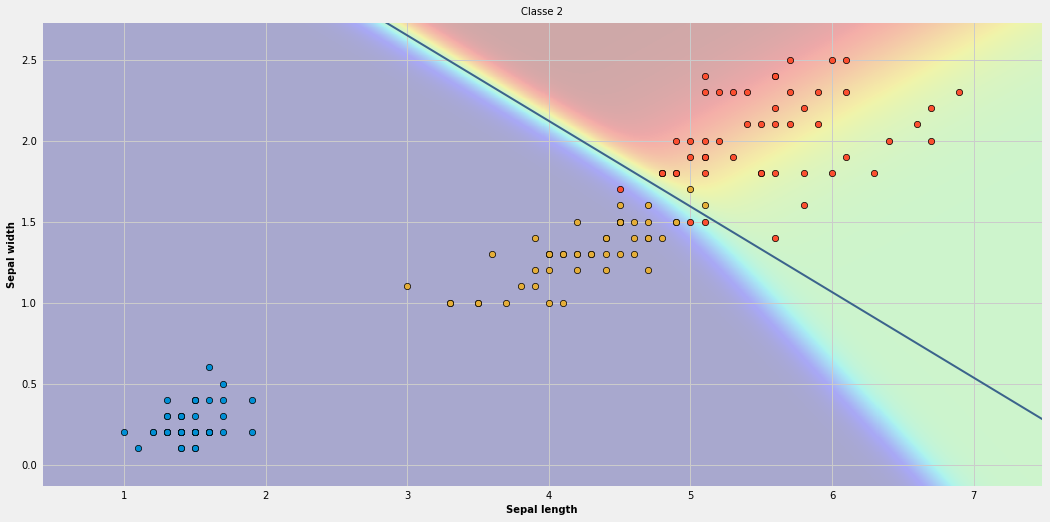

In [24]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p2, origin='lower', extent=(min1, max1, min2, max2), alpha=.3, aspect='auto')
plt.contour(u, v, p2, [0.5], colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
X2 = np.compress(t_s==2, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[2], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
ax.scatter(X2[:, 0], X2[:, 1], s=40, c=colors[1], edgecolor='k', marker= 'o', lw=.7, cmap=cmap)
plt.xlabel('Sepal length', fontsize=10)
plt.ylabel('Sepal width', fontsize=10)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Classe 2')
plt.show()

In [25]:
y = model.predict(X_train)
y_t = model.predict(X_test)

In [31]:
print(confusion_matrix(y,t_train))

[[34  0  0]
 [ 0 34  4]
 [ 0  3 30]]


In [37]:
print(confusion_matrix(y_t,t_test))

[[16  0  0]
 [ 0 13  0]
 [ 0  0 16]]


In [32]:
print(classification_report(y,t_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.92      0.89      0.91        38
          2       0.88      0.91      0.90        33

avg / total       0.93      0.93      0.93       105



In [38]:
print(classification_report(y_t,t_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        45



In [33]:
print(accuracy_score(y,t_train))

0.933333333333


In [39]:
print(accuracy_score(y_t,t_test))

1.0


In [40]:
X = np.array(data[data.columns[:-1]])

In [44]:
t = encoder.fit_transform(t)

In [46]:
model.set_params(clf__C=1e5)
model = model.fit(X, t)

In [47]:
y = model.predict(X)

In [48]:
print(confusion_matrix(y,t))

[[50  0  0]
 [ 0 48  1]
 [ 0  2 49]]


In [49]:
print(classification_report(y,t))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.98      0.97        49
          2       0.98      0.96      0.97        51

avg / total       0.98      0.98      0.98       150



In [50]:
print(accuracy_score(y,t))

0.98


In [65]:
fs = SelectKBest(mutual_info_classif, k=1).fit(X, y)

In [66]:
fs.get_support()

array([False,  True, False, False], dtype=bool)

In [62]:
X_new = fs.transform(X)

In [69]:
model.set_params(clf__C=1e5)
y = model.fit(X_new, t).predict(X_new)

In [70]:
print(accuracy_score(y,t))

0.96


In [73]:
accs = []
for k in range(1,5):
    X_new = SelectKBest(mutual_info_classif, k=k).fit_transform(X, y)
    y = model.fit(X_new, t).predict(X_new)
    accs.append(accuracy_score(y,t))

In [74]:
accs

[0.94666666666666666,
 0.95999999999999996,
 0.96666666666666667,
 0.97999999999999998]

In [110]:
domain = np.linspace(5.9,6,100)
param_grid = [{'C': domain, 'penalty': ['l1','l2']}]
r = LogisticRegression()
clf = GridSearchCV(r, param_grid, cv=10, scoring='accuracy')

In [111]:
clf = clf.fit(X,t)
scores = clf.cv_results_['mean_test_score']

In [112]:
clf.best_params_['C']

5.9585858585858587

In [127]:
y = clf.predict(X)

In [128]:
print(confusion_matrix(y,t))

[[50  0  0]
 [ 0 48  1]
 [ 0  2 49]]


In [129]:
print(classification_report(y,t))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.98      0.97        49
          2       0.98      0.96      0.97        51

avg / total       0.98      0.98      0.98       150



In [130]:
print('{0:3.5f}'.format(accuracy_score(y,t)))

0.98000
